In [128]:
import pandas as pd
import matplotlib.pyplot as plt

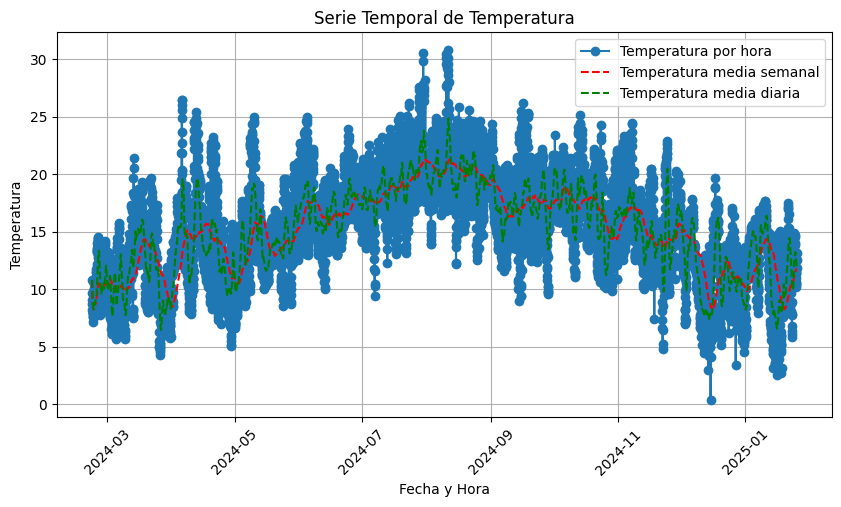

In [129]:
df = pd.read_csv("data.csv")
df["dt"] = pd.to_datetime(df["dt"], unit='s')

# Suavizar la serie temporal usando una media móvil
window_size = 24*7
df["smoothed_temp_week"] = df["main.temp"].rolling(window=window_size, min_periods=1).mean()
window_size = 24
df["smoothed_temp_day"] = df["main.temp"].rolling(window=window_size, min_periods=1).mean()

# Graficar la serie temporal de temperatura
plt.figure(figsize=(10, 5))
plt.plot(df["dt"], df["main.temp"], marker='o', linestyle='-', label='Temperatura por hora')
plt.plot(df["dt"], df["smoothed_temp_week"], color='red', linestyle='--', label='Temperatura media semanal')
plt.plot(df["dt"], df["smoothed_temp_day"], color='green', linestyle='--', label='Temperatura media diaria')
plt.xlabel("Fecha y Hora")
plt.ylabel("Temperatura")
plt.title("Serie Temporal de Temperatura")
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

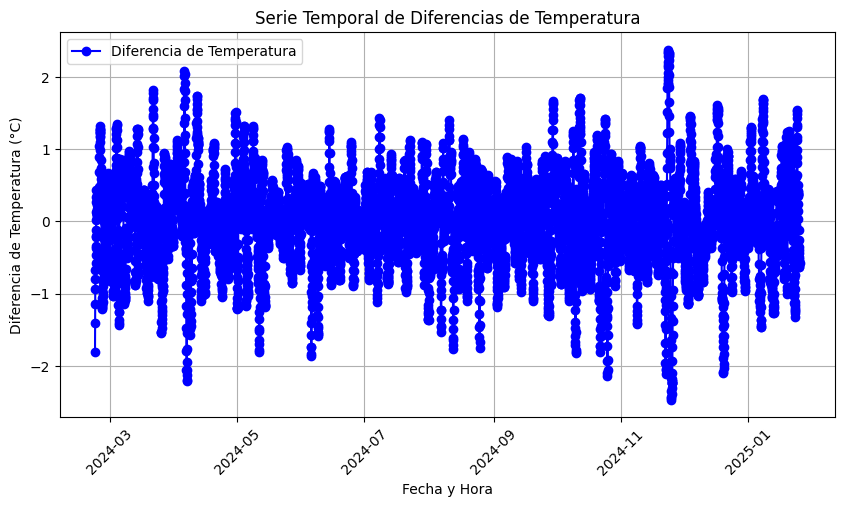

In [130]:
df["temp_diff"] = df["smoothed_temp_day"].diff(periods=6)

# Graficar la serie temporal de diferencias de temperatura
plt.figure(figsize=(10, 5))
plt.plot(df["dt"], df["temp_diff"], marker='o', linestyle='-', color='blue', label='Diferencia de Temperatura')
plt.xlabel("Fecha y Hora")
plt.ylabel("Diferencia de Temperatura (°C)")
plt.title("Serie Temporal de Diferencias de Temperatura")
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

/tmp/ipykernel_173105/1033019438.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="temp_increase_6h", data=df, palette="Blues_d")


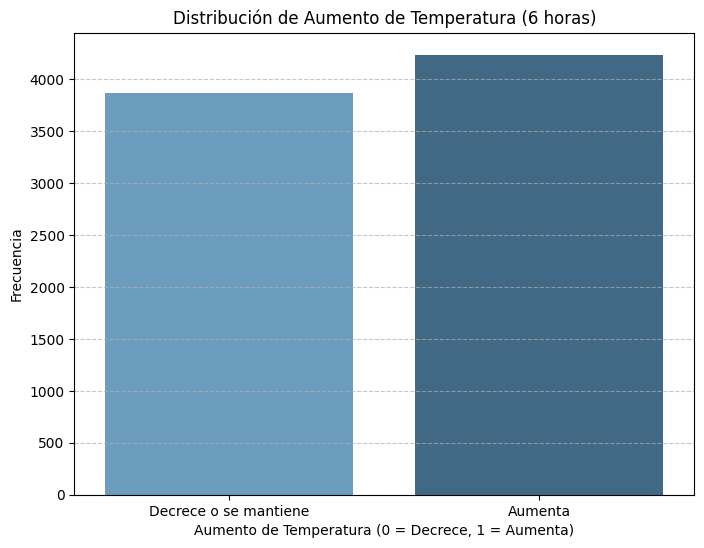

In [131]:
df["temp_diff_6h"] = df["smoothed_temp_day"].diff(periods=6)

# Create a binary column: 1 if temperature increased, 0 if decreased or stayed the same
df["temp_increase_6h"] = (df["temp_diff_6h"] > 0).astype(int)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x="temp_increase_6h", data=df, palette="Blues_d")

# Labeling the plot
plt.xlabel("Aumento de Temperatura (0 = Decrece, 1 = Aumenta)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Aumento de Temperatura (6 horas)")
plt.xticks(ticks=[0, 1], labels=['Decrece o se mantiene', 'Aumenta'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assume df is your DataFrame with 'temp_increase_6h' as the target
# Feature set: you can use the smoothed temperature and the temp_diff_6h, or any other relevant features

# Select features (for this example, I will use 'smoothed_temp_day' and 'temp_diff_6h')
features = ['main.pressure', 'main.humidity', 'main.temp_min', 'main.temp_max', 
            'wind.speed', 'wind.deg', 'clouds.all', 'wind.gust', 'rain.1h', 
            'smoothed_temp_week', 'smoothed_temp_day']

X = df[features].fillna(0)  # Fill missing values with 0
y = df["temp_increase_6h"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model (you can try other classifiers)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

Accuracy: 0.6846
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1131
           1       0.70      0.71      0.71      1301

    accuracy                           0.68      2432
   macro avg       0.68      0.68      0.68      2432
weighted avg       0.68      0.68      0.68      2432



/home/adriano/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
df.columns

Index(['Unnamed: 0', 'dt', 'main.temp', 'main.feels_like', 'main.pressure',
       'main.humidity', 'main.temp_min', 'main.temp_max', 'wind.speed',
       'wind.deg', 'wind.gust', 'clouds.all', 'weather.id', 'weather.main',
       'weather.description', 'weather.icon', 'rain.1h', 'smoothed_temp_week',
       'smoothed_temp_day', 'temp_diff', 'temp_diff_6h', 'temp_increase_6h'],
      dtype='object')

In [134]:
null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0                0
dt                        0
main.temp                 0
main.feels_like           0
main.pressure             0
main.humidity             0
main.temp_min             0
main.temp_max             0
wind.speed                0
wind.deg                  0
wind.gust              6826
clouds.all                0
weather.id                0
weather.main              0
weather.description       0
weather.icon              0
rain.1h                7705
smoothed_temp_week        0
smoothed_temp_day         0
temp_diff                 6
temp_diff_6h              6
temp_increase_6h          0
dtype: int64


In [135]:
#elimino estas dos columnas que tienen valores nulos 
df = df.drop(columns=["wind.gust", "rain.1h"])

#eliminar features innecesarias: posiblemente weather main, weather descriptoin, weather.icon (dejamos weather.id) Unnamed? dt?
df = df.drop(columns=["weather.main", "weather.description", "weather.icon"])

null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0            0
dt                    0
main.temp             0
main.feels_like       0
main.pressure         0
main.humidity         0
main.temp_min         0
main.temp_max         0
wind.speed            0
wind.deg              0
clouds.all            0
weather.id            0
smoothed_temp_week    0
smoothed_temp_day     0
temp_diff             6
temp_diff_6h          6
temp_increase_6h      0
dtype: int64


#### Typical approach is to use moving average of the variables


Está en los pipelines de los notebooks

In [ ]:
window_size = 24 * 7  # Ejemplo: media móvil semanal (7 días)

features = ['main.pressure', 'main.humidity', 'main.temp_min', 'main.temp_max', 
            'wind.speed', 'wind.deg', 'clouds.all', 'smoothed_temp_week', 'smoothed_temp_day']

# Aplicar media móvil a cada variable
for col in features:
    df[f"smoothed_{col}"] = df[col].rolling(window=window_size, min_periods=1).mean()

for col in features:
    df[f"ema_{col}"] = df[col].ewm(span=window_size, adjust=False).mean()

# Imprimir los primeros resultados para ver cómo quedó el DataFrame
print(df[['dt'] + [f"smoothed_{col}" for col in features]].head())


                   dt  smoothed_main.pressure  smoothed_main.humidity  \
0 2024-02-22 16:00:00                  1010.0               73.000000   
1 2024-02-22 17:00:00                  1010.0               77.000000   
2 2024-02-22 18:00:00                  1010.0               79.333333   
3 2024-02-22 19:00:00                  1010.0               80.000000   
4 2024-02-22 20:00:00                  1010.0               80.800000   

   smoothed_main.temp_min  smoothed_main.temp_max  smoothed_wind.speed  \
0                9.140000                 11.6100               7.7200   
1                8.860000                 11.5050               6.1750   
2                8.583333                 11.1500               5.4900   
3                8.312500                 10.9875               5.0175   
4                8.034000                 10.6660               5.0420   

   smoothed_wind.deg  smoothed_clouds.all  smoothed_smoothed_temp_week  \
0              290.0                 75.0 

In [137]:
X = df[features].fillna(0)  # Fill missing values with 0
y = df["temp_increase_6h"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model (you can try other classifiers)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

Accuracy: 0.6859


              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1131
           1       0.71      0.71      0.71      1301

    accuracy                           0.69      2432
   macro avg       0.68      0.68      0.68      2432
weighted avg       0.69      0.69      0.69      2432



/home/adriano/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Los resultados de aplicar Moving average a todos los features son practicamente idénticos 